In [169]:
import pandas as pd

In [170]:
import os
print(os.getcwd())

C:\Users\steph


In [171]:
df = pd.read_excel('C:/Users/steph/PizzaSales.xlsx')

In [172]:
print(df.columns)

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')


In [173]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [174]:
nombre_pizzas_uniques = df['pizza_id'].nunique()
print("Le nombre de pizzas uniques (pizza_id distincts) est :", nombre_pizzas_uniques)

Le nombre de pizzas uniques (pizza_id distincts) est : 91


In [175]:
nombre_commandes_uniques = df['order_id'].nunique()
print("Le nombre de commandes uniques (order_id distincts) est :", nombre_commandes_uniques)

Le nombre de commandes uniques (order_id distincts) est : 21350


In [176]:
df['date'] = pd.to_datetime(df['order_date'])
date_min = df['order_date'].min()
date_max = df['order_date'].max()
print("La plage de dates dans le jeu de données va de", date_min, "à", date_max)

La plage de dates dans le jeu de données va de 2015-01-01 00:00:00 à 2015-12-31 00:00:00


In [177]:
df['order_date'] = pd.to_datetime(df['order_date'])
commandes_par_jour = df.groupby('order_date')['order_id'].nunique()
print(commandes_par_jour)


order_date
2015-01-01    69
2015-01-02    67
2015-01-03    66
2015-01-04    52
2015-01-05    54
              ..
2015-12-27    35
2015-12-28    39
2015-12-29    27
2015-12-30    32
2015-12-31    73
Name: order_id, Length: 358, dtype: int64


In [178]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce').dt.time
df['order_datetime'] = pd.to_datetime(df['order_date'].astype(str) + ' ' + df['order_time'].astype(str), errors='coerce')
df['duree_traitement'] = pd.to_datetime('now') - df['order_datetime']
duree_moyenne_traitement = df['duree_traitement'].mean()
print("La durée moyenne pour traiter une commande (estimation) est :", duree_moyenne_traitement)

La durée moyenne pour traiter une commande (estimation) est : 3132 days 08:06:21.243941312


In [179]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%Y', errors='coerce')
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce').dt.time
df['order_datetime'] = pd.to_datetime(df['order_date'].astype(str) + ' ' + df['order_time'].astype(str), errors='coerce')
temps_traitement_par_pizza = pd.Timedelta(minutes=10)
df['temps_traitement_estime'] = df['quantity'] * temps_traitement_par_pizza
duree_moyenne_estimee = df['temps_traitement_estime'].mean()
print("La durée moyenne estimée pour traiter une commande (en fonction de la quantité de pizzas) est :", duree_moyenne_estimee)

La durée moyenne estimée pour traiter une commande (en fonction de la quantité de pizzas) est : 0 days 00:10:11.772932949


In [180]:
timestamps = ["11:38:36", "11:57:40", "11:57:40", "11:57:40", "11:57:40", "11:57:40",
              "12:12:28", "12:12:28", "12:16:31", "12:21:30", "12:29:36", "12:29:36",
              "12:50:37", "12:51:37", "12:52:01", "12:52:01", "12:52:01", "12:52:01", "12:52:01"]
df = pd.DataFrame({"Timestamp": timestamps})
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%H:%M:%S')
df['TimeSpent'] = df['Timestamp'].diff()
average_time_spent = df['TimeSpent'].mean()
print(df)
print(f"\nMoyenne du temps passé entre chaque commande : {average_time_spent}")

             Timestamp       TimeSpent
0  1900-01-01 11:38:36             NaT
1  1900-01-01 11:57:40 0 days 00:19:04
2  1900-01-01 11:57:40 0 days 00:00:00
3  1900-01-01 11:57:40 0 days 00:00:00
4  1900-01-01 11:57:40 0 days 00:00:00
5  1900-01-01 11:57:40 0 days 00:00:00
6  1900-01-01 12:12:28 0 days 00:14:48
7  1900-01-01 12:12:28 0 days 00:00:00
8  1900-01-01 12:16:31 0 days 00:04:03
9  1900-01-01 12:21:30 0 days 00:04:59
10 1900-01-01 12:29:36 0 days 00:08:06
11 1900-01-01 12:29:36 0 days 00:00:00
12 1900-01-01 12:50:37 0 days 00:21:01
13 1900-01-01 12:51:37 0 days 00:01:00
14 1900-01-01 12:52:01 0 days 00:00:24
15 1900-01-01 12:52:01 0 days 00:00:00
16 1900-01-01 12:52:01 0 days 00:00:00
17 1900-01-01 12:52:01 0 days 00:00:00
18 1900-01-01 12:52:01 0 days 00:00:00

Moyenne du temps passé entre chaque commande : 0 days 00:04:04.722222222


In [181]:
df = pd.read_excel('C:/Users/steph/PizzaSales.xlsx')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
average_quantity = df.groupby('order_id')['quantity'].sum().mean()
print(f"Quantité moyenne de pizzas commandées : {average_quantity}")

Quantité moyenne de pizzas commandées : 2.321967213114754


In [182]:
most_frequent_size = df['pizza_size'].mode().iloc[0]
print(f"Taille de pizza la plus fréquemment commandée : {most_frequent_size}")

Taille de pizza la plus fréquemment commandée : L


In [183]:
most_frequent_category = df['pizza_category'].mode().iloc[0]
print(f"Catégorie de pizza la plus fréquemment commandée : {most_frequent_category}")

Catégorie de pizza la plus fréquemment commandée : Classic


In [184]:
average_unit_price = df['unit_price'].mean()
print(f"Prix unitaire moyen des pizzas : {average_unit_price}")

Prix unitaire moyen des pizzas : 16.494132044426163


In [185]:
average_order_price = df['total_price'].mean()
print(f"Prix total moyen d'une commande : {average_order_price.mean()}")

Prix total moyen d'une commande : 16.821473673385437


In [186]:
max_unit_price_index = df['unit_price'].idxmax()
pizza_with_highest_unit_price = df.loc[max_unit_price_index, 'pizza_name']
print(f"Pizza avec le prix unitaire le plus élevé : {pizza_with_highest_unit_price}")

Pizza avec le prix unitaire le plus élevé : The Greek Pizza


In [187]:
pizza_sales_by_size = df.groupby('pizza_size')['quantity'].sum()
print("Nombre de pizzas vendues par taille :")
print(pizza_sales_by_size)

Nombre de pizzas vendues par taille :
pizza_size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64


In [188]:
pizza_count_by_category = df.groupby('pizza_category')['pizza_id'].count()
print("Nombre de pizzas dans chaque catégorie :")
print(pizza_count_by_category)

Nombre de pizzas dans chaque catégorie :
pizza_category
Chicken    10815
Classic    14579
Supreme    11777
Veggie     11449
Name: pizza_id, dtype: int64


In [189]:
from collections import Counter
# Concaténer toutes les listes d'ingrédients en une seule liste
all_ingredients = [ingredient for ingredients_list in df['pizza_ingredients'].str.split(', ') for ingredient in ingredients_list]
# Compter la fréquence d'apparition de chaque ingrédient
ingredient_counts = Counter(all_ingredients)
# Triez les ingrédients par fréquence d'apparition
most_common_ingredients = ingredient_counts.most_common()
# Afficher les ingrédients les plus couramment utilisés
print("Ingrédients les plus couramment utilisés :")
for ingredient, count in most_common_ingredients:
    print(f"{ingredient}: {count} fois")

Ingrédients les plus couramment utilisés :
Garlic: 27422 fois
Tomatoes: 26601 fois
Red Onions: 19547 fois
Red Peppers: 16284 fois
Mozzarella Cheese: 10333 fois
Pepperoni: 10300 fois
Spinach: 10012 fois
Mushrooms: 9624 fois
Chicken: 8443 fois
Capocollo: 6572 fois
Green Olives: 6174 fois
Artichokes: 5682 fois
Jalapeno Peppers: 5643 fois
Green Peppers: 5224 fois
Feta Cheese: 4748 fois
Pineapple: 4685 fois
Bacon: 4227 fois
Asiago Cheese: 3342 fois
Cilantro: 3341 fois
Corn: 3341 fois
Chipotle Sauce: 3341 fois
Goat Cheese: 3301 fois
Kalamata Olives: 3269 fois
Fontina Cheese: 3259 fois
Pesto Sauce: 2893 fois
Zucchini: 2485 fois
Barbecued Chicken: 2372 fois
Barbecue Sauce: 2372 fois
Sliced Ham: 2370 fois
Thai Sweet Chilli Sauce: 2315 fois
Artichoke: 2302 fois
Gouda Cheese: 2302 fois
Peperoncini verdi: 1887 fois
Coarse Sicilian Salami: 1887 fois
Luganega Sausage: 1887 fois
Onions: 1887 fois
Sun-dried Tomatoes: 1880 fois
Ricotta Cheese: 1850 fois
Gorgonzola Piccante Cheese: 1850 fois
Parmigiano 

In [190]:
# Spécifiez l'ingrédient recherché
ingredient_to_search = "Mozzarella Cheese"
# Utilisez str.contains pour vérifier la présence de l'ingrédient dans chaque pizza
pizzas_with_ingredient = df[df['pizza_ingredients'].str.contains(ingredient_to_search, case=False)]
print(f"Nombre de pizzas contenant {ingredient_to_search}: {len(pizzas_with_ingredient)}")

Nombre de pizzas contenant Mozzarella Cheese: 10333


In [191]:
pizzas_per_order = df.groupby('order_id')['quantity'].sum()
print("Répartition du nombre de pizzas par commande:")
print(pizzas_per_order.value_counts())

Répartition du nombre de pizzas par commande:
quantity
1     8111
2     6152
3     3207
4     3122
5      145
6       80
8       67
14      66
9       64
7       61
15      57
10      56
11      56
12      54
13      50
25       1
28       1
Name: count, dtype: int64


In [192]:
total_price_per_order = df.groupby('order_id')['total_price'].sum()
print("Répartition des prix totaux pour les commandes:")
print(total_price_per_order.value_counts())

Répartition des prix totaux pour les commandes:
total_price
20.75     1444
12.00      923
16.00      760
16.50      717
16.75      710
          ... 
248.00       1
135.75       1
213.20       1
115.20       1
203.45       1
Name: count, Length: 1113, dtype: int64


In [193]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['day'] = df['order_date'].dt.date
daily_revenue = df.groupby('day')['total_price'].sum()
print("Chiffre d'affaires quotidien :")
print(daily_revenue)

Chiffre d'affaires quotidien :
day
2015-01-01    2713.85
2015-01-02    2731.90
2015-01-03    2662.40
2015-01-04    1755.45
2015-01-05    2065.95
               ...   
2015-12-27    1419.00
2015-12-28    1637.20
2015-12-29    1353.25
2015-12-30    1337.80
2015-12-31    2916.00
Name: total_price, Length: 358, dtype: float64


In [194]:
df = pd.read_excel('C:/Users/steph/PizzaSales.xlsx')
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.minute
df['order_time'].fillna(df['order_time'].mean(), inplace=True)
correlation = df['order_time'].corr(df['total_price'])
print(f"Corrélation entre l'heure de la journée et le total de la commande : {correlation}")

Corrélation entre l'heure de la journée et le total de la commande : -0.03130702501706369


In [195]:
pizza_quantities = df.groupby('pizza_name')['quantity'].sum()
top_5_pizzas = pizza_quantities.sort_values(ascending=False).head(5)
print("Les 5 pizzas les plus commandées en quantité :")
print(top_5_pizzas)

Les 5 pizzas les plus commandées en quantité :
pizza_name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


In [196]:
df['revenue'] = df['quantity'] * df['unit_price']
pizza_revenues = df.groupby('pizza_name')['revenue'].sum()
top_5_pizzas_revenues = pizza_revenues.sort_values(ascending=False).head(5)
print("Les 5 pizzas les plus commandées en termes de chiffre d'affaires :")
print(top_5_pizzas_revenues)

Les 5 pizzas les plus commandées en termes de chiffre d'affaires :
pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: revenue, dtype: float64


Répartition du chiffre d'affaires pour chaque taille de pizza :
pizza_size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: revenue, dtype: float64


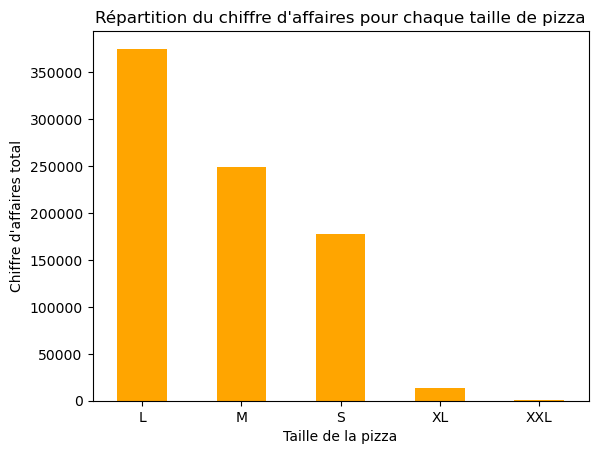

In [197]:
import matplotlib.pyplot as plt
df['revenue'] = df['quantity'] * df['unit_price']
size_revenues = df.groupby('pizza_size')['revenue'].sum()
print("Répartition du chiffre d'affaires pour chaque taille de pizza :")
print(size_revenues)
size_revenues.plot(kind='bar', rot=0, color='orange')
plt.title("Répartition du chiffre d'affaires pour chaque taille de pizza")
plt.xlabel("Taille de la pizza")
plt.ylabel("Chiffre d'affaires total")
plt.show()

Répartition du chiffre d'affaires pour chaque catégorie de pizza :
pizza_category
Chicken    195919.50
Classic    220053.10
Supreme    208197.00
Veggie     193690.45
Name: revenue, dtype: float64


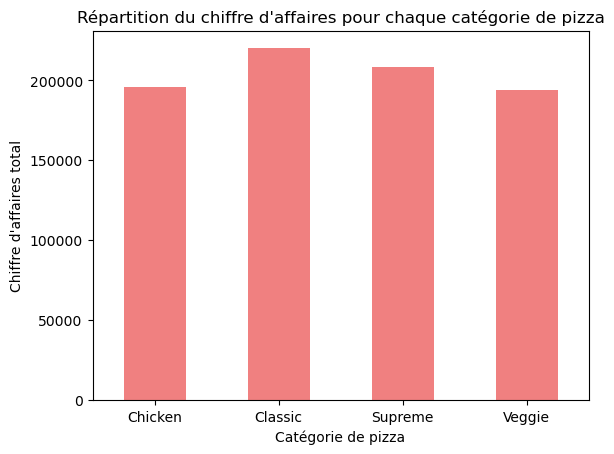

In [198]:
df['revenue'] = df['quantity'] * df['unit_price']
category_revenues = df.groupby('pizza_category')['revenue'].sum()
print("Répartition du chiffre d'affaires pour chaque catégorie de pizza :")
print(category_revenues)
category_revenues.plot(kind='bar', rot=0, color='lightcoral')
plt.title("Répartition du chiffre d'affaires pour chaque catégorie de pizza")
plt.xlabel("Catégorie de pizza")
plt.ylabel("Chiffre d'affaires total")
plt.show()

In [199]:
correlation = df['unit_price'].corr(df['quantity'])
print(f"Corrélation entre le prix unitaire et la quantité commandée : {correlation}")

Corrélation entre le prix unitaire et la quantité commandée : 0.007142463924669933


In [200]:
average_unit_price_by_size = df.groupby('pizza_size')['unit_price'].mean()
print(average_unit_price_by_size)

pizza_size
L      19.802553
M      15.951219
S      12.364328
XL     25.500000
XXL    35.950000
Name: unit_price, dtype: float64


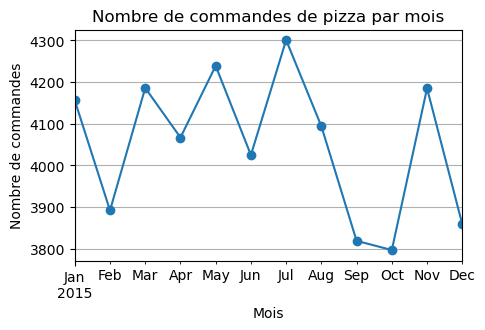

In [201]:
import matplotlib.pyplot as plt
df['order_date'] = pd.to_datetime(df['order_date'])
monthly_orders = df.resample('M', on='order_date').size()
plt.figure(figsize=(5, 3))
monthly_orders.plot(kind='line', marker='o')
plt.title('Nombre de commandes de pizza par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de commandes')
plt.grid(True)
plt.show()

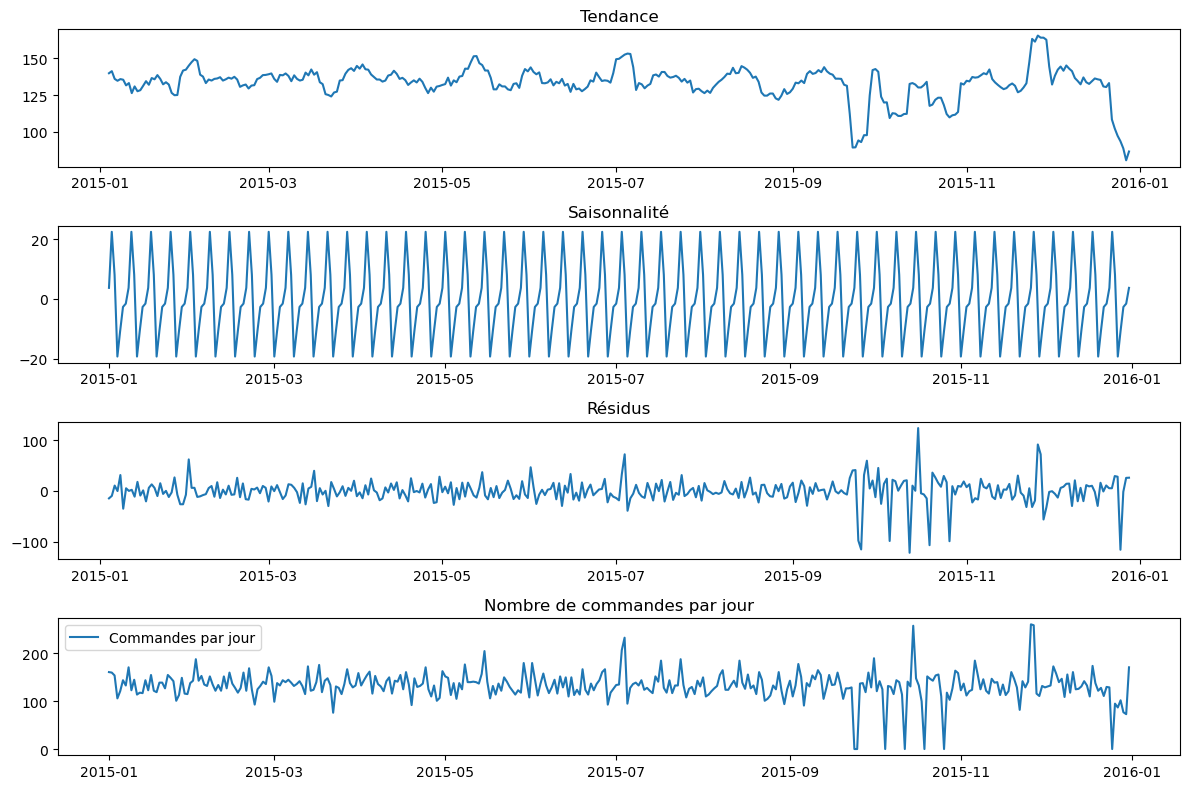

In [202]:
from statsmodels.tsa.seasonal import seasonal_decompose
daily_orders = df.resample('D', on='order_date').size()
result = seasonal_decompose(daily_orders, model='additive')
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Tendance')
plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Saisonnalité')
plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Résidus')
plt.subplot(4, 1, 4)
plt.plot(daily_orders, label='Commandes par jour')
plt.legend()
plt.title('Nombre de commandes par jour')
plt.tight_layout()
plt.show()

day_of_week
Friday       8106
Monday       6369
Saturday     7355
Sunday       5917
Thursday     7323
Tuesday      6753
Wednesday    6797
Name: order_id, dtype: int64


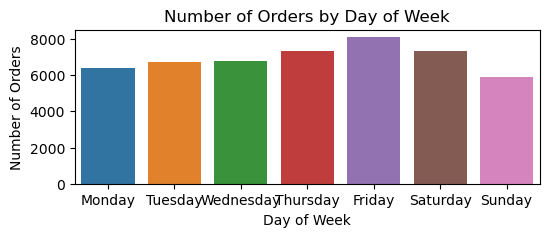

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
df['order_date'] = pd.to_datetime(df['order_date'])
df['day_of_week'] = df['order_date'].dt.day_name()
daily_orders_by_day = df.groupby('day_of_week')['order_id'].count()
print(daily_orders_by_day)
plt.figure(figsize=(6, 2))
sns.barplot(x=daily_orders_by_day.index, y=daily_orders_by_day.values, order=[
            'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of Week')
plt.show()